3.10

A comparison of an n-turn loop antenna and a dipole antenna in terms of directivity 

$$ D(\theta)=\frac{3}{2}sin^2\theta $$
$$ D(\theta)=\frac{2}{1.218}\frac{cos(\frac{\pi}{2}cos^2\theta)}{sin^2\theta} $$

And a comparison of radiation efficiency

$$ \eta_{rad} = \frac{\frac{1}{6}\eta \pi (ka)^4}{\frac{1}{6}\eta \pi (ka)^4 + \frac{a}{b}R_s} $$
$$ \eta_{rad} = \frac{\frac{1}{6\pi}\eta (kl)^2}{\frac{1}{6\pi}\eta (kl)^2 + \frac{l}{2\pi b}R_s} $$

And a comparison of signal power

$$ P_{sig}=S^{inc}\frac{\lambda^2}{4\pi}\eta_{rad}D $$

Maximum directivity of loop antenna:  1.4999990487956547
Maximum directivity of dipole antenna:  1.4999990487956547


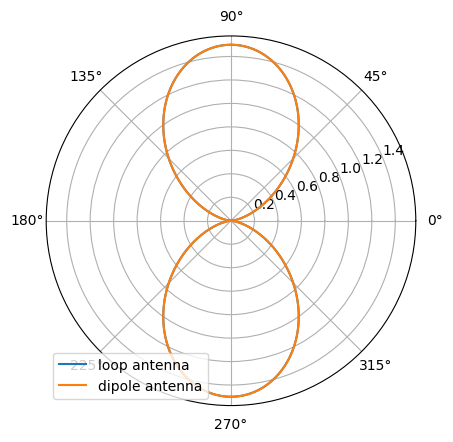

In [76]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.special import sici

## Directivity ##
# variables
theta = np.arange(0.01, 2*np.pi, 0.01)  # Avoid theta = 0
f = 2.4e9                               # wifi/bluetooth frequency
lam = 3e8/f                             # wavelength
k = 2*np.pi/lam                         # wave number
l = 8e-3                                # length of dipole
gamma = 0.5772                          # Euler's constant

# Directivity of a loop and dipole
D_loop = 3*np.sin(theta)**2 / 2

# hertzian dipole
D_dipole = 3*np.sin(theta)**2 / 2

# half wavelength
#D_dipole = 2*(np.cos(np.pi*np.cos(theta)/2)**2)/(1.218*np.sin(theta)**2) 

#### Radiation resistance of a Finite Dipole ####
# # Integrate over each value in elec_len
# S_1, C_1 = sici(k*l)
# S_2, C_2 = sici(2*k*l)

# # Radiation pattern integral
# f_kl = (gamma 
#         + np.log(k*l) 
#         - C_1 
#         + 0.5*np.sin(k*l) * (S_2-2*S_1) 
#         + 0.5*np.cos(k*l) * (gamma+np.log(k*l/2)+C_2-2*C_1)
#         )
# D_dipole = 2*((np.cos(k*l*np.cos(theta)/2)-np.cos(k*l/2))/(np.sin(theta)))**2/f_kl


# print maximums
print("Maximum directivity of loop antenna: ", max(D_loop))
print("Maximum directivity of dipole antenna: ", max(D_dipole))

# create plots
plt.polar(theta, np.abs(D_loop), label="loop antenna")
plt.polar(theta, np.abs(D_dipole), label="dipole antenna")

# Show legend
plt.legend()

# display plot
plt.show()

In [77]:
## Radiation Efficiency ##
# variables
a = 4e-3                                # radius of loop
b = 0.25e-3                             # radius of loop wire
c = 2*np.pi*b                           # circumference of loop

eta = 377                               # resistance of freespace
sigma = 5.96e7                          # cunductivity of copper
mu_o = 4*np.pi*10**-7                   # magnetic permeability of freespace
mu_r = 0.999994                         # relative permeability of copper
mu = mu_o*mu_r                          # permeability of copper
delta_s = 1 / np.sqrt(np.pi*f*mu*sigma) # skin depth
R_s = 1 / (sigma*delta_s)               # Surface Resistence
print("Surface Radiation", R_s)         # Debug for surface radiation

# calculate the radiation efficiency of the antennas
eta_loop = (eta*np.pi*(k*a)**4/6) / (eta*np.pi*(k*a)**4/6 + a*R_s/b)
eta_dipole = (eta*(k*l)**2/(6*np.pi)) / (eta*(k*l)**2/(6*np.pi) + l*R_s/(2*np.pi*b))
print("radiation efficiency of a loop: ", eta_loop)
print("raditaion efficiency of a dipole: ", eta_dipole)

Surface Radiation 0.012608431300834359
radiation efficiency of a loop:  0.6152529031296988
raditaion efficiency of a dipole:  0.9805314862312843


3.12

(a) Design a square patch antenna at 1.9GHz with a dielectric coefficient of 2.25

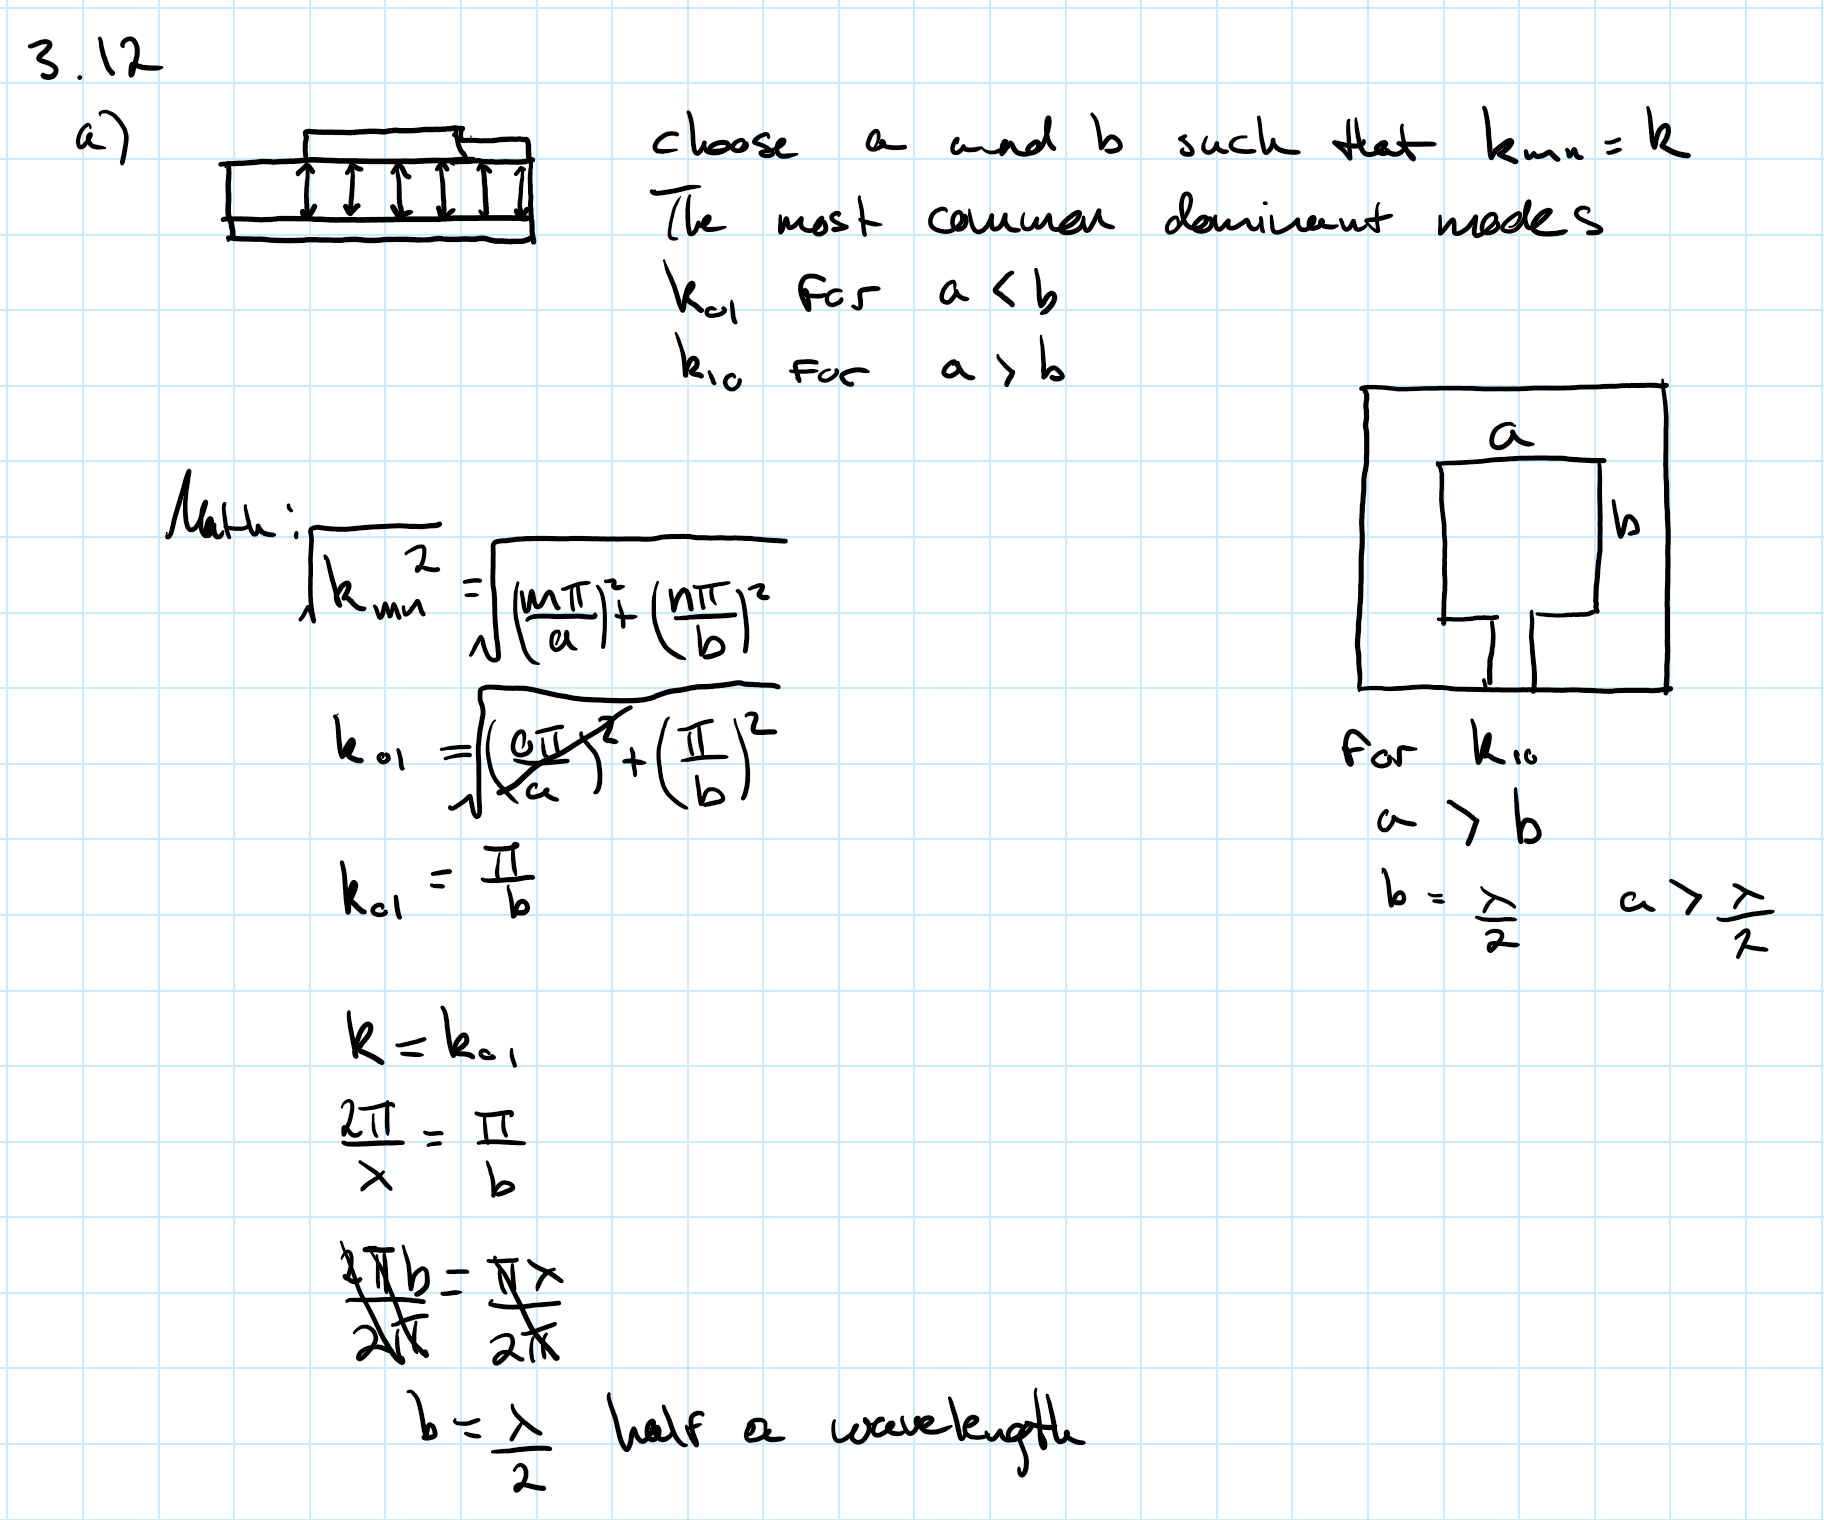

a =  3944679.443331792
b =  15778717.773327168


In [78]:
from IPython.display import Image
from IPython.core.display import HTML 

# show work done by hand
display(Image("a and b values.png", width=500, height=500))

# Design a square patch antenna at 1.9GHz with a dielectric coefficient of 2.25
f = 1.9e9                                   # frequency
omega = 2*np.pi*f                           # radial frequency
epsilon = 8.854e-12                         # permittivity of free-space
epsilon_r = 2.25                            # dielectric constant
c = 3e8/np.sqrt(mu*epsilon_r*epsilon)       # speed of light through substrate
k =  omega / c                              # wavenumber
b = (np.pi*3e8)/(2*np.pi*f*np.sqrt(mu_o*epsilon*epsilon_r))                                 # b length
a = b/4                                     # a length
print("a = ", a)
print("b = ", b)

3.12

(b) Plot theta cuts of the radiation pattern for $\phi=0$ and $\phi=\pi/2$

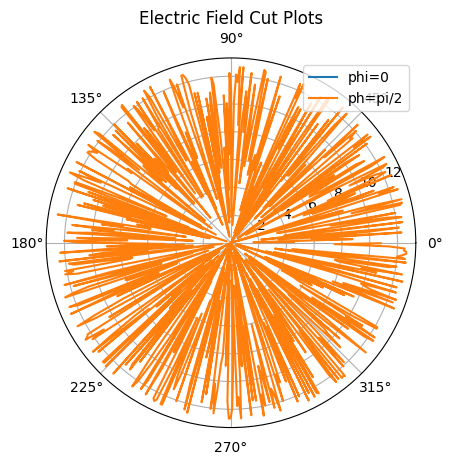

In [79]:
# Plot theta cuts of the radiation pattern for phi=0 and phi=pi/2

# variables
k = 2*np.pi/lam                                     # wave number
omega = 2*np.pi*f                                   # radial frequency
phi_1 = 0                                           # rad cut 1
phi_2 = np.pi/2                                     # rad cut 2
r = 1
t = 1

# for k01
m = 0                                               # mode coefficient
n = 1                                               # mode coefficient

kx_1 = k*np.sin(theta)*np.cos(phi_1)                
kx_2 = k*np.sin(theta)*np.cos(phi_2)
ky_1 = k*np.sin(theta)*np.sin(phi_1)
ky_2 = k*np.sin(theta)*np.sin(phi_2)

g1_1 = 2*np.exp(1j*kx_1*a/2)*np.exp(1j*ky_1*b/2)*np.cos(ky_1*b/2)*np.sin(kx_1*a/2) / (kx_1*a/2)
g1_2 = 2*np.exp(1j*kx_2*a/2)*np.exp(1j*ky_2*b/2)*np.cos(ky_2*b/2)*np.sin(kx_2*a/2) / (kx_2*a/2)

Fx_1 = epsilon*np.exp(-1j*k*r)*2*t*g1_1/(4*np.pi*r)
Fx_2 = epsilon*np.exp(-1j*k*r)*2*t*g1_2/(4*np.pi*r)

E_1 = 1j*omega*eta*Fx_1                                 # cut 1
E_2 = 1j*omega*eta*Fx_2                                 # cut 2

# create plots
plt.polar(theta, np.abs(E_1), label="phi=0")            # plot phi= 0
plt.polar(theta, np.abs(E_2), label="ph=pi/2")          # plot phi=pi/2
plt.title("Electric Field Cut Plots")                   # title
plt.legend()                                            # Show legend
plt.show()                                              # display plot

3.12

(c) Based on the radiation patterns estimate directivity

According to the textbook the directivity should be 6. The pattern is similar to a dipole giving a directivity of 3/2 or 1.5 (see 3.10 - directivity). Then because the patch is square there will be another dipole adding a factor of two. There will be another factor of two for the ground plane.

In the research literature, find an electrically small antenna. (a) Determine its electrical size,ka, where a is the radius of the smallest sphere containing the antenna, at the design center frequency f0. 

In [80]:
# For a spherical wire coil antenna


(b) Determine the fractional bandwidth BW/f0. 

(c) Compute the lossless Q boundfor the antenna and estimate the theoretical bandwidth limit. How close is the antenna’s fractional bandwidth to the theoretical bound